# Fraud detection

In this project, we try to predict the fraud and legal transactions. 
First we will explore the data and apply pre-processing for three meain reseans: 
1. missing values and finding ways to remove them.
2. finding a solution for non-numerical values (oridnal and categorical values).
3. finding outliers and finding ways to remove them.

### Install following libraries

pandas_profiling <br>

yellowbrick <br>

eli5  <br>

xgboost <br>

scikitplot <br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from scipy import interp
import pylab as pl
import time
from itertools import cycle
import itertools
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced

from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation, metrics
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.utils import shuffle


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###  Importing dataset , change the directory accordingly

In [2]:
## Import dataset 

data = pd.read_csv('C:/Users/sbadretale/Desktop/sample.csv')

y = data.y
listt = ['y']
# x = data.drop(listt,axis = 1 )

print('data shape:' ,data.shape)
data.head(5)

data shape: (8000, 101)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,...,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,...,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,...,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,...,-3.841669,5.189840,10.291069,-3.642396,0.674300,-1.104317,-3.922342,-0.613947,7.275179,0
4,0.750715,15.656095,-6.778600,11.251037,-0.308200,0.0%,Wednesday,2.498892,-0.323229,-2.624680,...,8.933781,-7.295794,-11.246059,-4.876594,3.395415,-2.646844,-5.273267,-5.259536,-3.240523,0


In [3]:
## Check how many rows there are NaN values  -->   all the rows

data.isnull().sum(axis=1).sum()

8000

In [4]:
## Detailed summary of the dataset

#import pandas_profiling
#pandas_profiling.ProfileReport(data)

In [5]:
# Check to see if there are any missing values in our data set

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
x20,100,1.2500
x78,98,1.2250
x86,97,1.2125
x75,97,1.2125
x93,97,1.2125
x16,97,1.2125
x84,95,1.1875
x5,94,1.1750
x60,94,1.1750
x92,93,1.1625


In [6]:
## Replace all NaN elements with 0. (For now, we can find some statistical method like mean, and average methods later )

data = data.fillna(0)
data.isnull().values.any()
# data[data.isnull().any(axis=1)]

False

In [7]:
## Label encoding, converting each value in a column to a number

cleanup_nums = {"x6":  {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thurday": 4, "Friday": 5 },
                "x27": {"Morning": 1, "Afternoon": 2, "Evening": 3, "Night": 4},
                "x20": {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, 
                        "Jul":7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12 }}

data.replace(cleanup_nums, inplace=True)
data.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,0.000000,0.03%,2,-9.808905,4.753455,2.537819,...,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,3,10.710053,1.608882,-2.027541,...,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,2,-3.364649,-2.493473,1.429913,...,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,4,-6.111982,-1.796377,-3.169510,...,-3.841669,5.189840,10.291069,-3.642396,0.674300,-1.104317,-3.922342,-0.613947,7.275179,0
4,0.750715,15.656095,-6.778600,11.251037,-0.308200,0.0%,3,2.498892,-0.323229,-2.624680,...,8.933781,-7.295794,-11.246059,-4.876594,3.395415,-2.646844,-5.273267,-5.259536,-3.240523,0


In [8]:
## Converting columns x5 and x57 to int by removing % and $

df_5 = data.x5
df_5 = pd.to_numeric(df_5.str.replace('%', ''))
data = data.drop(['x5'], axis=1)
data['encoded_x5'] = df_5
## 
data['x49'] = data['x49'] *1
##
df_57 = data.x57
df_57 = pd.to_numeric(df_57.str.replace('$', ''))
data = data.drop(['x57'], axis=1)
data['encoded_x57'] = df_57
data

,x0,x1,x2,x3,x4,x6,x7,x8,x9,x10,...,x93,x94,x95,x96,x97,x98,x99,y,encoded_x5,encoded_x57
0,-0.247824,6.425853,-6.485658,-8.241462,0.000000,2,-9.808905,4.753455,2.537819,-0.536291,...,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0,0.03,1578.34
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,3,10.710053,1.608882,-2.027541,1.861159,...,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0,0.02,767.76
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,2,-3.364649,-2.493473,1.429913,-5.575753,...,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0,-0.00,931.06
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,4,-6.111982,-1.796377,-3.169510,-2.244341,...,10.291069,-3.642396,0.674300,-1.104317,-3.922342,-0.613947,7.275179,0,0.00,2124.52
4,0.750715,15.656095,-6.778600,11.251037,-0.308200,3,2.498892,-0.323229,-2.624680,12.697317,...,-11.246059,-4.876594,3.395415,-2.646844,-5.273267,-5.259536,-3.240523,0,0.00,-3055.67
5,3.942698,-18.383415,-12.777878,-7.278459,0.804100,3,-3.001185,-4.991621,0.460029,8.221584,...,-2.391985,0.874414,1.706174,-13.268248,-2.342301,-3.364491,2.942276,0,0.00,1171.04
6,-0.401409,3.330333,0.618703,4.594938,-1.791589,0,-0.701722,0.792518,4.102517,3.857004,...,-5.830327,-1.417252,2.784021,-7.550103,-5.701524,2.599121,-0.348635,0,-0.00,-252.52
7,1.613197,-11.909071,9.170306,13.011830,1.739728,3,0.577534,3.004651,-7.313795,-2.191617,...,8.422668,-1.607765,2.710710,-9.982559,-9.150300,-5.202536,-2.617726,0,0.00,-1285.32
8,0.106990,-5.702141,13.328336,0.000000,2.738774,4,-2.695694,-2.771388,-1.634272,2.084540,...,-3.187017,2.862387,1.356857,11.971134,-0.902051,-1.510150,5.271868,0,-0.00,-1324.35
9,-2.621119,1.703715,-4.177126,-1.759203,1.893540,3,7.152825,0.421298,1.640919,-3.779130,...,-16.259481,0.798252,0.380437,-4.621909,-1.840878,2.270506,-13.606076,0,-0.01,-539.57


In [9]:
data = data.fillna(0)
data.isnull().values.any()

False

In [10]:
# convert a pandas dataframe to a numpy ndarray and extracting input and label

x = data.drop(listt,axis = 1 )

x_columns = x.columns
x = x.values
x = x.astype(np.float16)
x = np.nan_to_num(x)
print (np.any(np.isnan(x)))

False


### Duplicate rows? No

In [11]:
# Duplicate rows? No

normal_duplicates = sum( data.loc[ data.y==0 ].duplicated() )
fraud_duplicates = sum( data.loc[ data.y==1 ].duplicated() )
total_duplicates = normal_duplicates + fraud_duplicates

print( 'Normal duplicates: ', normal_duplicates )
print( 'Fraud duplicates: ', fraud_duplicates )
print( 'Total duplicates: ', total_duplicates )
print( 'Fraction duplicated: ', total_duplicates / len(data) )

Normal duplicates:  0
Fraud duplicates:  0
Total duplicates:  0
Fraction duplicated:  0.0


### Check if data is skewed? Not much 

In [12]:
# Check if data is skewed? Not much 

data.skew()

x0             0.005847
x1             0.391578
x2             0.035608
x3            -0.012227
x4            -0.010577
x6            -0.385778
x7            -0.003449
x8             0.024734
x9            -0.085862
x10           -0.056543
x11           -0.034434
x12            0.026215
x13           -0.007876
x14            0.004784
x15           -0.015405
x16            0.010573
x17           -0.017318
x18           -0.016519
x19            0.017470
x20           -0.488196
x21           -0.009498
x22           -0.021990
x23           -0.037318
x24           -0.004255
x25            0.001738
x26           -0.030987
x27           -0.475989
x28            0.008379
x29            0.006405
x30            0.019365
                 ...   
x73           -0.009449
x74            0.008842
x75           -0.022244
x76           -0.042687
x77            0.014301
x78            0.018871
x79           -0.000235
x80           -0.005612
x81           -0.146529
x82            0.034593
x83           -0

Number of Non-Fraud:  7561
Number of Fraud :  439


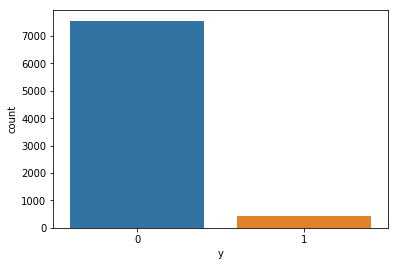

In [13]:
ax = sns.countplot(y,label="Count")     
NF, F = y.value_counts()
print('Number of Non-Fraud: ',NF)
print('Number of Fraud : ',F)

## Split dataset into %60 train set and %40 test set using Stratified Shuffle Split

In [14]:
kshuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=seed)
for train_index, test_index in kshuffle.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4800, 100), (3200, 100), (4800,), (3200,))

### There are 176 fraud records and 3024 legal records in the test set. 

In [15]:
print("Lenght Test class zero:", sum(y_test == 0))
print("Lenght Test class one:", sum(y_test == 1))
print("Lenght Train class zero:", sum( y_train == 0))
print("Lenght Train class one:", sum( y_train == 1))

Lenght Test class zero: 3024
Lenght Test class one: 176
Lenght Train class zero: 4537
Lenght Train class one: 263


In [16]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics 
from sklearn.metrics import classification_report
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## First, try Logistic Regression with default parameters

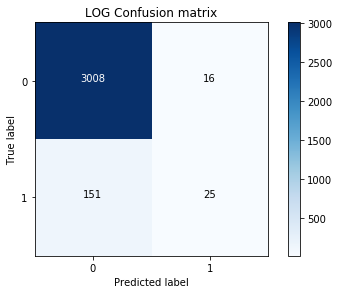

Precision =     0.610
Recall    =     0.142
F1_score  =     0.230


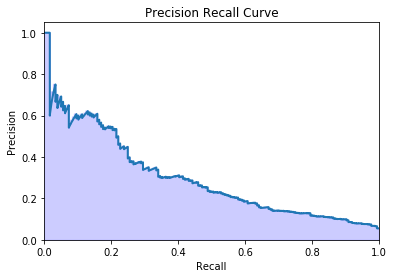

In [18]:
# Logistic regression 
log_cfl = LogisticRegression()

log_cfl.fit(x_train, y_train)
y_pred = log_cfl.predict(x_test)
y_score = log_cfl.decision_function(x_test)  

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()


# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

### Find the best parameters : AU-ROC optimization

#### It takes time you may skip this step.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(x_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   29.7s finished


The best parameters for using this model is {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}


### Logistic regression with the best parameters for AU-ROC

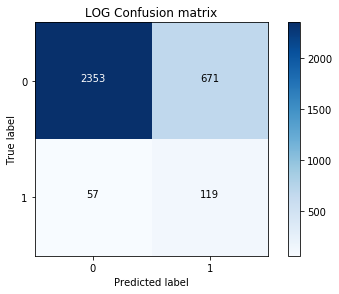

Precision =     0.151
Recall    =     0.676
F1_score  =     0.246


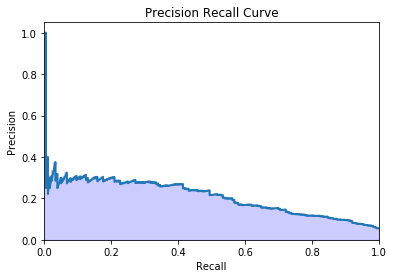

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.78      0.68      0.87      0.38      0.16      3024
          1       0.15      0.68      0.78      0.25      0.38      0.13       176

avg / total       0.93      0.77      0.68      0.83      0.38      0.16      3200



In [23]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(x_train, y_train)
y_pred = log_cfl.predict(x_test)
y_score = log_cfl.decision_function(x_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_test, y_pred))

### Find the best parameters : Recall optimization

#### It takes time you may skip this step.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(x_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   30.8s finished


The best parameters for using this model is {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}


### Logistic regression with the best parameters for Recall

In [ ]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(x_train, y_train)
y_pred = log_cfl.predict(x_test)
y_score = log_cfl.decision_function(x_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_test, y_pred))

## Now lets try Support vector machines

### Find the best parameters for SVM : AU-ROC optimization

#### It takes time you may skip this step.

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 0.001, 0.01, 0.1, 1],
               'class_weight' : ['balanced', None],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_cfl = svm.SVC()

n_iter_search = 40
CV_svm_cfl = RandomizedSearchCV(estimator = svm_cfl, param_distributions = param_grid , n_iter=n_iter_search,
                                scoring = 'roc_auc', verbose = 1, n_jobs = 1)
CV_svm_cfl.fit(x_train, y_train)

best_parameters = CV_svm_cfl.best_params_
print('The best parameters for using this model is', best_parameters)
'''

In [ ]:
best_parameters

### SVM with the best parameters for AU-ROC

In [ ]:
svm_cfl = svm.SVC( kernel = best_parameters['kernel'], 
           gamma = best_parameters['gamma'], 
           class_weight = best_parameters['class_weight'],
           C = best_parameters['C']
          )

svm_cfl.fit(x_train, y_train)
y_pred = svm_cfl.predict(x_test)
y_score = svm_cfl.decision_function(x_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_test, y_pred))

### Find the best parameters for SVM : Recall optimization
#### It takes time you may skip this step.

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 0.001, 0.01, 0.1, 1],
               'class_weight' : ['balanced', None],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_cfl = svm.SVC()

n_iter_search = 40
CV_svm_cfl = RandomizedSearchCV(estimator = svm_cfl, param_distributions = param_grid , n_iter=n_iter_search,
                                scoring = 'recall', verbose = 1, n_jobs = 1)
CV_svm_cfl.fit(x_train, y_train)

best_parameters = CV_svm_cfl.best_params_
print('The best parameters for using this model is', best_parameters)
'''

### SVM with the best parameters for Recall

In [ ]:
svm_cfl = svm.SVC( kernel = best_parameters['kernel'], 
           gamma = best_parameters['gamma'], 
           class_weight = best_parameters['class_weight'],
           C = best_parameters['C']
          )

svm_cfl.fit(x_train, y_train)
y_pred = svm_cfl.predict(x_test)
y_score = svm_cfl.decision_function(x_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_test, y_pred))

## It's time for Random forest

### Find the best parameters for Random Forest ( It takes a few hours)

In [ ]:
'''
## randomized search to tune hyperparameters

# build a classifier
clf = RandomForestClassifier()
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "n_estimators":[8, 16, 32, 64, 100, 200],
              "max_features": sp_randint(1, 100),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 40
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   verbose = 2, n_iter=n_iter_search, random_state = seed, n_jobs  = -1)

start = time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
'''

### Random Forest with the best parameters , Number 1

In [ ]:
## Test the best result 

clf = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 22.0, max_features= 36, 
                             min_samples_leaf= 2, min_samples_split= 5, n_estimators= 64)
clf.fit(x_train, y_train)
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()

y_score = clf.predict_proba(x_test)[:,1]

fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()
print(classification_report_imbalanced(y_true, y_pred))

### Random Forest with the best parameters for Recall

In [ ]:
## Test the best result with optimized for Recall

clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 26.0, max_features= 78, 
                             min_samples_leaf= 9, min_samples_split= 11, n_estimators= 64)
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)[:,1]

y_pred = np.zeros(y_score.shape[0])
for i in range(0,y_score.shape[0]):
    if y_score[i] >=0.45: ## lower the lower FP
        y_pred[i] = 1

y_true  = y_test
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

from imblearn.metrics import classification_report_imbalanced
# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_true, y_pred))

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### Another Random Forest with the best parameters for Recall

In [ ]:
## Test the best result with optimized for Recall

clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 36.0, max_features= 40, 
                             min_samples_leaf= 10, min_samples_split= 11, n_estimators= 240)
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)[:,1]

y_pred = np.zeros(y_score.shape[0])
for i in range(0,y_score.shape[0]):
    if y_score[i] >=0.45: ## lower the lower FP
        y_pred[i] = 1

y_true  = y_test
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

from imblearn.metrics import classification_report_imbalanced
# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_true, y_pred))

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### Another Random Forest with the best parameters for Recall

In [ ]:
## Test the best result with optimized for Recall

clf = RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 33.0, max_features= 32, 
                             min_samples_leaf= 11, min_samples_split= 22, n_estimators= 180)
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)[:,1]

y_pred = np.zeros(y_score.shape[0])
for i in range(0,y_score.shape[0]):
    if y_score[i] >=0.45: ## lower the lower FP
        y_pred[i] = 1

y_true  = y_test
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

from imblearn.metrics import classification_report_imbalanced
# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_true, y_pred))

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### Random Forest with the best parameters for AU-ROC

In [ ]:
## Test the best result with optimized for AUC

clf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 31.0, max_features= 60, 
                             min_samples_leaf= 17, min_samples_split= 28, n_estimators= 50)
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)[:,1]

y_pred = np.zeros(y_score.shape[0])
for i in range(0,y_score.shape[0]):
    if y_score[i] >=0.45: ## lower the lower FP
        y_pred[i] = 1

y_true  = y_test
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()


# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_true, y_pred))

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### Trying differnet decsion boundaries for finding most optimal threshold value

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data

## Changing the decision boundary to adjust the value of precision and Recall

In [ ]:
## Test the best result with optimized for Recall

clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 26.0, max_features= 78, 
                             min_samples_leaf= 9, min_samples_split= 11, n_estimators= 64)
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)[:,1]

y_pred = np.zeros(y_score.shape[0])
for i in range(0,y_score.shape[0]):
    if y_score[i] >=0.31: ## lower the lower FP
        y_pred[i] = 1

y_true  = y_test
print(classification_report(y_true, y_pred))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

from imblearn.metrics import classification_report_imbalanced
# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(y_true, y_pred))

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_lift_curve(y_true=y_true, y_probas=clf.predict_proba(x_test))
plt.show()

In [ ]:
skplt.metrics.plot_ks_statistic(y_true=y_true, y_probas = clf.predict_proba(x_test))
plt.show()

In [ ]:
skplt.metrics.plot_cumulative_gain(y_true, clf.predict_proba(x_test))
plt.show()

In [ ]:
skplt.estimators.plot_learning_curve(clf, x_train, y_train)
plt.show()

### Plot the ROC curve for the above result

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Plot the feature importance fr Random Forest

In [ ]:
clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 36.0, max_features= 40, 
                             min_samples_leaf= 10, min_samples_split= 11, n_estimators= 240)
clf.fit(x, y)

In [ ]:
importances = clf.feature_importances_[:10]
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), x_columns[indices])
plt.xlabel('Relative Importance')

### or this code

#from eli5 import show_weights
#show_weights(clf, feature_names=x_columns.tolist())

### or this code

#df = pd.DataFrame({'feature importances': clf.feature_importances_}, index=x_columns)
#df.sort_values(by="feature importances", ascending=False).head(10)

### Visualize a smaple tree in Random Forest

In [ ]:
from eli5 import show_weights
from eli5 import show_prediction

est_tree0 = clf.estimators_[0]
show_weights(est_tree0, feature_names=x_columns.tolist())

In [ ]:
'''
from sklearn.tree import export_graphviz
import os

export_graphviz(clf.estimators_[0],
                feature_names=x_columns.tolist(),
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')
'''

## Now let's try XGBoost

In [ ]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

def recall(preds, dtrain):
    labels = dtrain.get_label()
    return 'recall',  recall_score(labels, np.round(preds))

def f1(preds, dtrain):
    labels = dtrainn.get_label()
    return 'f1',  f1_score(labels, np.round(preds))

def precision(preds, dtrain):
    labels = dtrainn.get_label()
    return 'precision',  precision_score(labels, np.round(preds))

def roc_auc(preds, dtrain):
    labels = dtrainn.get_label()
    return 'roc_auc',  roc_auc_score(labels, preds)

def BaseMetrics(y_pred,y_true):
    TP = np.sum( (y_pred == 1) & (y_true == 1) )
    TN = np.sum( (y_pred == 0) & (y_true == 0) )
    FP = np.sum( (y_pred == 1) & (y_true == 0) )
    FN = np.sum( (y_pred == 0) & (y_true == 1) )
    return TP, TN, FP, FN

def SimpleMetrics(y_pred,y_true):
    TP, TN, FP, FN = BaseMetrics(y_pred,y_true)
    ACC = ( TP + TN ) / ( TP + TN + FP + FN )
    
    # Reporting
    from IPython.display import display
    print( 'Confusion Matrix')
    display( pd.DataFrame( [[TN,FP],[FN,TP]], columns=['Pred 0','Pred 1'], index=['True 0', 'True 1'] ) )
    print( 'Accuracy : {}'.format( ACC ))
    
def SimpleAccuracy(y_pred,y_true):
    TP, TN, FP, FN = BaseMetrics(y_pred,y_true)
    ACC = ( TP + TN ) / ( TP + TN + FP + FN )
    return ACC

In [ ]:
## xgboost

import xgboost as xgb

dtrainn = xgb.DMatrix(x_train, y_train, feature_names=x_columns)
dvalidd = xgb.DMatrix(x_test, y_test, feature_names=x_columns)

results_dict = {}

xgb_params = {
     'max_depth': 12,
     'min_child_weight':7,
#     'colsample_bytree': 0.2,  if we want a high precision score (low FN value)
        'reg_alpha': 0.01,
    'objective': 'binary:logistic',
    'random_state': seed,
    'eval_metric': 'auc', # auc, error
#     'tree_method': 'hist'
#     'grow_policy': 'lossguide' # depthwise, lossguide
    'class_weight': 'balanced'
}

xgb_test = xgb.train(xgb_params, dtrainn, num_boost_round=1000, 
                     verbose_eval=False,
                     early_stopping_rounds=40, 
                     evals=[(dtrainn,'train'),(dvalidd,'test')],
                     evals_result = results_dict,              
                     feval = recall, maximize=True
#                      feval = roc_auc, maximize=True
                    )

y_pred = xgb_test.predict(dvalidd, ntree_limit=xgb_test.best_iteration+1)
y_true = y_test
print( 'best iteration: ', xgb_test.best_iteration )

print(classification_report(y_true, np.round(y_pred)))

# Confusion maxtrix & metrics
cm = confusion_matrix(y_true, np.round(y_pred))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Random Forest')
plt.show()

show_metrics()



fpr, tpr, t = roc_curve(y_test, y_pred)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall()

print(classification_report_imbalanced(y_true, np.round(y_pred)))

'''
print( recall( y_pred, dvalidd ) )
print( precision( y_pred, dvalidd ) )
print( roc_auc( y_pred, dvalidd ) )
# print( 'Accuracy: {:.3f}'.format(SimpleAccuracy(y_pred, y_true)) )
SimpleMetrics( np.round(y_pred), y_true)
'''

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_pred,y_true)

In [ ]:
# Let's look at how the metrics changed on the train and test sets as more trees were added

for i in results_dict:
    for err in results_dict[i]:
        plt.plot(results_dict[i][err], label=i+' '+err)   
plt.axvline(xgb_test.best_iteration, c='green', label='best iteration')
plt.xlabel('iteration')
# plt.ylabel(err)
plt.title('xgboost learning curves')
plt.legend()
plt.grid() ;

In [ ]:
# Plot feature importances

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
xgb.plot_importance(xgb_test, max_num_features=20, height=0.5, ax=ax);

# As a result, XGBoost and Random Forest produced the best results. 

### Lets apply Stratified-KFold croos validation on the best result so far (Random Forest)

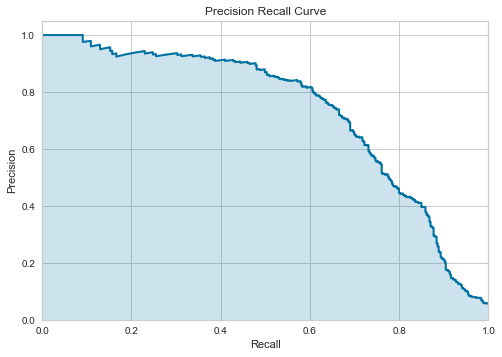

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.33      0.98      0.95      0.90      7561
          1       0.93      0.33      1.00      0.49      0.95      0.89       439

avg / total       0.96      0.96      0.37      0.95      0.95      0.90      8000



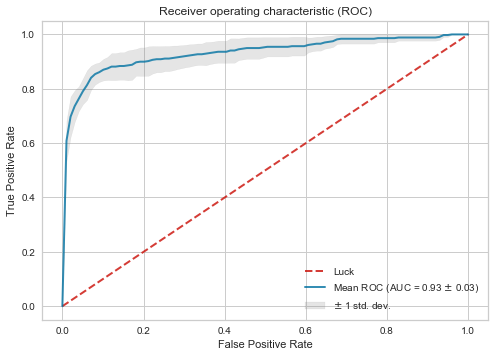

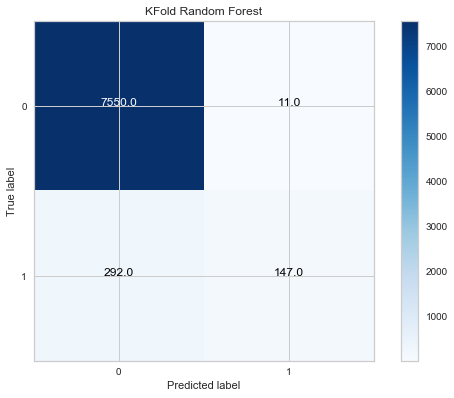

In [167]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state =seed )
y_pred_all = []
y_real_all = []
y_score_all = []

cm=np.zeros((2,2))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

clf = RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 33.0, max_features= 32, 
                             min_samples_leaf= 11, min_samples_split= 22, n_estimators= 180)

for train, test in skf.split(x, y):

    clf.fit(x[train], y[train])

    y_score = clf.predict_proba(x[test])[:,1]
    
    y_pred = clf.predict(x[test])

    y_pred_all.append(y_pred)
    
    y_score_all.append(y_score)
    
    y_real_all.append(y[test])
    
    ## confusion matrix
    cm += confusion_matrix(y[test], y_pred)
    
    ## ROC curve
    fpr, tpr, thresholds = roc_curve(y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.concatenate((y_real_all),axis=0), np.concatenate((y_score_all),axis=0))
plot_precision_recall()

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(np.concatenate((y_real_all),axis=0), np.concatenate((y_pred_all),axis=0)))

## ROC

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, classes = class_names, title = 'KFold Random Forest')

### Applying Stratified-KFold croos validation on another best result so far (Random Forest)

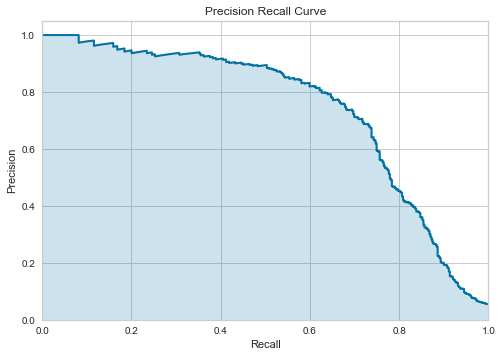

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      1.00      0.50      0.98      0.93      0.88      7561
          1       0.89      0.50      1.00      0.64      0.93      0.86       439

avg / total       0.97      0.97      0.53      0.97      0.93      0.88      8000



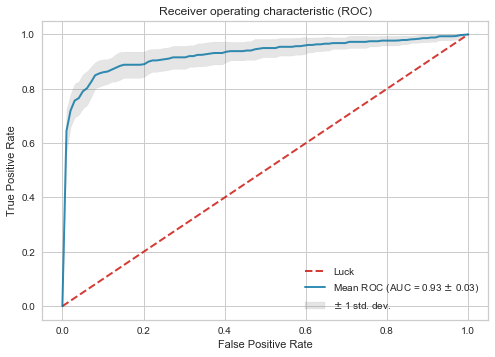

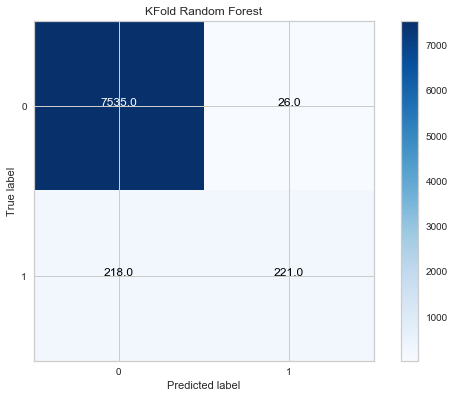

In [168]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state =seed )
y_pred_all = []
y_real_all = []
y_score_all = []

cm=np.zeros((2,2))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 36.0, max_features= 40, 
                             min_samples_leaf= 10, min_samples_split= 11, n_estimators= 240)

for train, test in skf.split(x, y):

    clf.fit(x[train], y[train])

    y_score = clf.predict_proba(x[test])[:,1]
    
    y_pred = clf.predict(x[test])

    y_pred_all.append(y_pred)
    
    y_score_all.append(y_score)
    
    y_real_all.append(y[test])
    
    ## confusion matrix
    cm += confusion_matrix(y[test], y_pred)
    
    ## ROC curve
    fpr, tpr, thresholds = roc_curve(y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.concatenate((y_real_all),axis=0), np.concatenate((y_score_all),axis=0))
plot_precision_recall()

# Report for precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.
print(classification_report_imbalanced(np.concatenate((y_real_all),axis=0), np.concatenate((y_pred_all),axis=0)))

## ROC

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, classes = class_names, title = 'KFold Random Forest')

## Lets apply the last random forest model on test set 

In [202]:
## Apply the model on train file and Save Model Using Pickle

import pickle

clf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 36.0, max_features= 40, 
                             min_samples_leaf= 10, min_samples_split= 11, n_estimators= 240)

clf.fit(x, y)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=36.0, max_features=40,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=11, min_weight_fraction_leaf=0.0,
            n_estimators=240, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [209]:
## Importing the test file

data_test = pd.read_csv('C:/Users/sbadretale/Desktop/test.csv')

data_test.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-1.514284,-12.485595,10.593498,-5.002425,-0.419907,0.01%,Wednesday,-1.089788,0.196689,2.139182,...,4.0,7.152219,9.629630,2.544992,-4.702698,-0.387781,-8.510972,-1.320433,3.479030,-11.769354
1,-0.988268,29.655347,3.838360,3.868849,-1.294265,-0.0%,Wednesday,-3.944761,-1.565021,8.216759,...,3.0,-9.673933,-5.787857,-17.676507,-0.318778,-2.078193,3.499461,5.576143,-2.698396,-9.410448
2,3.317484,-4.822399,9.678680,17.815120,0.754625,-0.0%,Wednesday,-0.148101,-1.645103,2.135212,...,3.0,-10.733762,-0.305876,-6.785229,0.220154,2.496943,-3.883966,6.226439,2.454146,-1.224857
3,4.863474,-0.006963,5.931868,-4.529761,-2.261027,-0.0%,Wednesday,-17.570001,2.168551,3.732319,...,3.0,8.062077,3.949675,0.494529,-5.162874,1.159392,-2.661473,-2.462430,1.572517,-8.811929
4,-2.870043,-9.920092,6.925923,3.860836,0.252619,-0.01%,Wednesday,0.857456,-2.186101,-0.502004,...,4.0,-0.210101,-9.162798,4.953034,2.455752,-0.617239,7.565136,6.612028,-3.757768,1.030277


In [210]:
## replacing missing values with zero

data_test = data_test.fillna(0)

In [211]:
## label encoding for three features

cleanup_nums = {"x6":  {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thurday": 4, "Friday": 5 },
                "x27": {"Morning": 1, "Afternoon": 2, "Evening": 3, "Night": 4},
                "x20": {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, 
                        "Jul":7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12 }}

data_test.replace(cleanup_nums, inplace=True)

In [213]:
## Converting columns x5 and x57 to int by removing % and $

df_5 = data_test.x5
df_5 = pd.to_numeric(df_5.str.replace('%', ''))
data_test = data_test.drop(['x5'], axis=1)
data_test['encoded_x5'] = df_5
## 
data_test['x49'] = data_test['x49'] *1
##
df_57 = data_test.x57
df_57 = pd.to_numeric(df_57.str.replace('$', ''))
data_test = data_test.drop(['x57'], axis=1)
data_test['encoded_x57'] = df_57
data_test

,x0,x1,x2,x3,x4,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,encoded_x5,encoded_x57
0,-1.514284,-12.485595,10.593498,-5.002425,-0.419907,3,-1.089788,0.196689,2.139182,-0.741130,...,9.629630,2.544992,-4.702698,-0.387781,-8.510972,-1.320433,3.479030,-11.769354,0.01,103.77
1,-0.988268,29.655347,3.838360,3.868849,-1.294265,3,-3.944761,-1.565021,8.216759,4.751049,...,-5.787857,-17.676507,-0.318778,-2.078193,3.499461,5.576143,-2.698396,-9.410448,-0.00,-1284.96
2,3.317484,-4.822399,9.678680,17.815120,0.754625,3,-0.148101,-1.645103,2.135212,-4.698875,...,-0.305876,-6.785229,0.220154,2.496943,-3.883966,6.226439,2.454146,-1.224857,-0.00,2908.70
3,4.863474,-0.006963,5.931868,-4.529761,-2.261027,3,-17.570001,2.168551,3.732319,-7.119962,...,3.949675,0.494529,-5.162874,1.159392,-2.661473,-2.462430,1.572517,-8.811929,-0.00,838.78
4,-2.870043,-9.920092,6.925923,3.860836,0.252619,3,0.857456,-2.186101,-0.502004,5.800400,...,-9.162798,4.953034,2.455752,-0.617239,7.565136,6.612028,-3.757768,1.030277,-0.01,-792.86
5,1.865201,18.782344,1.125886,2.753019,1.679057,4,-4.150061,-2.211649,8.280067,-12.530949,...,-28.099776,-2.706102,-5.885919,-1.415943,3.996341,12.438862,-5.383361,-6.953038,-0.00,-104.95
6,-7.011992,-1.001261,-16.491919,-3.131066,1.411958,3,6.174086,-1.754792,-8.367634,-1.319611,...,10.665127,12.561519,-1.822731,2.272161,-3.120773,3.468010,5.688631,5.032754,-0.01,834.18
7,-3.258692,-1.810127,-3.737027,-10.898254,0.371716,2,-7.702959,0.828560,-3.980229,-0.932803,...,13.078123,9.232882,3.529010,0.079088,-12.029130,-11.539997,4.599012,-3.096629,-0.00,464.14
8,1.962591,-9.702658,-1.608219,-2.710587,-1.219208,4,1.760759,2.198072,-1.110798,-8.573471,...,0.611448,3.532048,2.674304,-0.072910,-2.583160,11.690626,-0.604709,-1.501259,-0.01,-575.78
9,-0.932559,-15.822312,15.004796,0.000000,-1.749546,1,10.750610,-0.073778,-0.997882,0.636809,...,-7.366157,7.669729,-1.014739,-1.039026,-0.101555,4.376345,-1.939614,-0.640735,0.01,-56.96


In [226]:
## replacing missing values with zero and checking for null values

data_test = data_test.fillna(0)
data_test.isnull().values.any()

False

In [227]:
x = data_test[:]

x_columns = x.columns
x = x.values
x = x.astype(np.float16)
x = np.nan_to_num(x)
print (np.any(np.isnan(x)))

False


In [234]:
## Calculating the prediction and prediction probability

y_score_test = clf.predict_proba(x)[:,1]

y_pred_test = clf.predict(x)

## Countign how many graud and legal were found

np.bincount(y_pred_test.astype(int))

array([1941,   59], dtype=int64)

In [232]:
## adding prediction and prediction probability to test file

data_test['Prediction'] = y_pred_test
data_test['Probability_Prediction'] = y_score_test

In [237]:
## Write the test dataframe to csv file 

data_test.to_csv('test_amir.csv')